# Installing packages

In [ ]:
# Install LaTeX packages required for SciencePlots to render high-quality figures.
# This includes dvipng, texlive-latex-extra, texlive-fonts-recommended, and cm-super.
# These packages ensure proper LaTeX typesetting for mathematical expressions and font rendering.

!sudo apt-get -qq install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

In [ ]:
# Install Python packages for machine learning, data analysis, and visualization.
# Key packages include:
# - optuna: Hyperparameter optimization framework.
# - optuna-integration: Integrations for Optuna with ML libraries.
# - shap: SHapley Additive exPlanations for model interpretability.
# - missingno: Visualization tools for analyzing missing data.
# - puncc: Metrics for evaluating regression models.
# - scikit-learn: Machine learning tools for data mining and analysis.
# - SciencePlots: Matplotlib styles for publication-quality figures.
# - mapie: Conformal prediction methods, including jackknife+.

!pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.10.0 seaborn==0.13.2 \
             scienceplots==2.1.1 scikit-learn==1.5.2 lightgbm==4.5.0 \
             optuna==4.2.0 optuna-integration==4.2.1 scipy==1.13.1 \
             tqdm==4.67.1 puncc==0.8.0 mapie==0.9.2

# Alternatively, install dependencies using a requirements.txt file.
# !pip install -r requirements.txt -q

# importing packages and setting up the environment

In [2]:
# Data Manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Visualization
import matplotlib  # Base plotting library
import matplotlib.pyplot as plt  # Static, animated, and interactive visualizations
import matplotlib.colors as mcolors  # Color handling in plots
import seaborn as sns  # Statistical data visualization
import scienceplots  # Enhanced scientific plotting styles

# Machine Learning
import sklearn  # Core machine learning library
from lightgbm import LGBMRegressor  # Gradient boosting regressor
from lightgbm import log_evaluation, early_stopping  # Logging and early stopping for LightGBM
import optuna.integration.lightgbm as lgb  # Optuna integration for LightGBM hyperparameter tuning
import optuna  # Hyperparameter optimization framework

# Model Evaluation
from sklearn.metrics import *  # Metrics for model evaluation
from sklearn.model_selection import *  # Model selection utilities
from sklearn.inspection import permutation_importance  # Feature importance via permutation
from mapie.regression import MapieRegressor  # Conformal prediction for regression
from deel.puncc.metrics import regression_mean_coverage, regression_sharpness  # Regression evaluation metrics

# Feature Engineering
from scipy.cluster import hierarchy  # Hierarchical clustering
from scipy.spatial.distance import squareform  # Distance matrix utilities

# Utilities
import gc  # Garbage collection for memory management
import warnings  # Warning management
import itertools  # Efficient looping with iterators
from collections import defaultdict  # Default dictionaries for easier data handling
from tqdm import tqdm  # Progress bars for loops

# File Handling
from google.colab import files  # File handling in Google Colab
import os  # Operating system interface
from zipfile import ZipFile  # ZIP file creation and extraction

# Date and Time
from datetime import datetime  # Date and time manipulation

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Import pkg_resources to access installed packages and their versions.
import pkg_resources

# Function to retrieve installed packages and their versions as a dictionary.
def get_installed_packages():
    installed_packages = pkg_resources.working_set
    return {package.key: package.version for package in installed_packages}

# Retrieve installed packages.
dependencies = get_installed_packages()

# List of required packages for the project.
required_packages = [
    'pandas', 'numpy', 'matplotlib', 'seaborn', 'scienceplots',
    'scikit-learn', 'lightgbm', 'optuna', 'optuna-integration',
    'scipy', 'tqdm', 'puncc', 'mapie'
]

# Write installed versions of required packages to requirements.txt.
with open('requirements.txt', 'w') as f:
    for package in required_packages:
        if package in dependencies:
            f.write(f"{package}=={dependencies[package]}\n")

# Print the contents of requirements.txt to verify.
with open("requirements.txt", "r") as f:
    print(f.read())

<ipython-input-3-2eeb1c4f6f32>:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


pandas==2.2.2
numpy==1.26.4
matplotlib==3.10.0
seaborn==0.13.2
scienceplots==2.1.1
scikit-learn==1.5.2
lightgbm==4.5.0
optuna==4.2.0
optuna-integration==4.2.1
scipy==1.13.1
tqdm==4.67.1
puncc==0.8.0
mapie==0.9.2



In [4]:
# Configure scikit-learn to return pandas DataFrames for transformed outputs.
sklearn.set_config(transform_output="pandas")

# Set a random seed for reproducibility across libraries.
# 42 (it’s a convention in the machine learning community)
SEED = 42

# Enable inline plotting for Jupyter notebooks.
%matplotlib inline

# Suppress warnings to avoid cluttering the output.
warnings.filterwarnings("ignore")

# Set Optuna's logging verbosity to WARNING to reduce unnecessary output.
optuna.logging.set_verbosity(optuna.logging.WARNING)

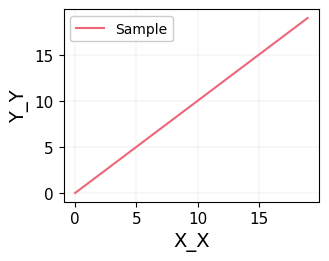

In [5]:
# Reset matplotlib to default settings to clear any previous customizations.
plt.rcdefaults()

# Apply custom styles for plots: IEEE standards, grid, and bright colors.
plt.style.use(['ieee', 'grid', 'bright'])

# Global configuration for matplotlib plots.
mpl_global_config = {
    'font.family': ['sans'],  # Use sans-serif font for text.
    'figure.dpi': 100,  # Display resolution for on-screen figures.
    'savefig.dpi': 1500,  # High-resolution output for saved figures.
    'savefig.transparent': False,  # Disable transparency in saved figures.
    'savefig.bbox': 'tight',  # Remove extra whitespace around saved figures.
    'axes.axisbelow': True,  # Place grid lines below data points.
    'axes.spines.top': True,  # Display top spine of the plot.
    'axes.spines.right': True,  # Display right spine of the plot.
    'axes.spines.bottom': True,  # Display bottom spine of the plot.
    'axes.spines.left': True,  # Display left spine of the plot.
    'axes.labelsize': 14,  # Font size for axis labels.
    'legend.fontsize': 10,  # Font size for legend text.
    "xtick.labelsize": 11,  # Font size for x-axis tick labels.
    "ytick.labelsize": 11,  # Font size for y-axis tick labels.
    'grid.linewidth': 0.12,  # Thin grid lines for subtlety.
    'grid.linestyle': '--',  # Dashed grid lines.
}

# Update matplotlib's global configuration with the defined settings.
plt.rcParams.update(mpl_global_config)

# Test the configuration with a sample plot.
plt.plot(range(20), c="#EE6677", label="Sample")  # Plot a sample line.
plt.xlabel("X_X")  # Label for the x-axis.
plt.ylabel("Y_Y")  # Label for the y-axis.
plt.legend(fancybox=True)  # Display legend with a rounded box.

# Uncomment to save the plot as a high-resolution image.
# plt.savefig("SamplePlot")

# Helper Functions

In [6]:
# Function to summarize data and save to CSV
def summarize_data(df, filename):
    """
    Summarizes the given DataFrame and saves the summary to a CSV file.

    Parameters:
    df (DataFrame): The DataFrame to summarize. This is the input data that will be analyzed.
    filename (str): The name of the file to save the summary. This is the output file where the summary will be stored.
    """

    # Generate a statistical summary of the DataFrame using the `describe()` method.
    # This includes count, mean, standard deviation, min, max, and quartiles for numerical columns.
    data_summary = df.describe()

    # Add a row to the summary for the ratio of missing values in each column.
    # `df.isnull().sum()` counts the number of missing values in each column.
    # `divide(len(df))` calculates the ratio of missing values by dividing by the total number of rows.
    data_summary.loc["Missing Values Ratio"] = df.isnull().sum().divide(len(df))

    # Add a row to the summary for the ratio of unique values in each column.
    # `df.nunique()` counts the number of unique values in each column.
    # `divide(len(df))` calculates the ratio of unique values by dividing by the total number of rows.
    data_summary.loc["Unique Values Ratio"] = df.nunique().divide(len(df))

    # Add a row to the summary for the kurtosis of each column.
    # Kurtosis measures the "tailedness" of the data distribution.
    # Positive kurtosis indicates heavy tails, while negative kurtosis indicates light tails.
    data_summary.loc["Kurtosis"] = df.kurtosis()

    # Add a row to the summary for the skewness of each column.
    # Skewness measures the asymmetry of the data distribution.
    # Positive skewness indicates a longer tail on the right, while negative skewness indicates a longer tail on the left.
    data_summary.loc["Skewness"] = df.skew()

    # Transpose the summary DataFrame (swap rows and columns) for better readability.
    # Round all values to 3 decimal places for consistency and readability.
    # Save the transposed and rounded summary DataFrame to a CSV file with the specified filename.
    data_summary.T.round(3).to_csv(filename)


def plot_corr_heatmap(df, ax=None, method='pearson', cmap='coolwarm', triangular=False,
                      handle_missing=None, figsize=(10, 8), use_title=True):
    """
    Plots a correlation heatmap for the given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame for which to plot the correlation heatmap.
    ax (Axes): The Axes object to draw the heatmap on. If None, a new figure is created.
    method (str): The method to compute the correlation ('pearson', 'kendall', 'spearman').
    cmap (str): The colormap to use for the heatmap.
    triangular (bool): If True, only show the upper triangle of the heatmap.
    handle_missing (str): How to handle missing values ('mean', 'median', or None).
    figsize (tuple): Size of the figure (width, height).
    use_title (bool): If True, adds a title to the plot.

    Returns:
    ax: The Axes object containing the heatmap.
    """
    # Handle missing values based on the specified method.
    # If 'mean' is specified, fill missing values with the column mean.
    if handle_missing == 'mean':
        df = df.fillna(df.mean())
    # If 'median' is specified, fill missing values with the column median.
    elif handle_missing == 'median':
        df = df.fillna(df.median())
    # If 'zeros' is specified, fill missing values with 0.
    elif handle_missing == 'zeros':
        df.fillna(0)

    # Calculate the correlation matrix for the DataFrame using the specified method.
    # The method can be 'pearson', 'kendall', or 'spearman'.
    corr = df.corr(method=method)

    # Create a mask for the upper triangle of the correlation matrix if `triangular` is True.
    # This is useful for reducing redundancy in symmetric correlation matrices.
    mask = None
    if triangular:
        # `np.triu` creates an upper triangular matrix of ones, and `dtype=bool` converts it to a boolean mask.
        mask = np.triu(np.ones_like(corr, dtype=bool))

    # Create a new figure if no Axes object is provided.
    # This ensures the heatmap is drawn on a new figure if no existing Axes is passed.
    if ax is None:
        plt.figure(figsize=figsize)  # Set the figure size using the provided `figsize`.
        ax = plt.gca()  # Get the current Axes object to draw the heatmap on.

    # Draw the heatmap using Seaborn's `heatmap` function.
    # - `corr`: The correlation matrix to visualize.
    # - `mask`: The mask to apply (e.g., upper triangle mask).
    # - `cmap`: The colormap to use for the heatmap (e.g., 'coolwarm').
    # - `annot`: If True, display the correlation values on the heatmap.
    # - `fmt`: Format the annotation values to 2 decimal places.
    # - `square`: If True, ensure the heatmap cells are square.
    # - `linewidths`: Set the width of the lines between cells.
    # - `cbar_kws`: Adjust the size of the color bar.
    # - `ax`: The Axes object to draw the heatmap on.
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f",
                 square=True, linewidths=0.5, cbar_kws={"shrink": .8}, ax=ax)

    # Add a title to the plot if `use_title` is True.
    # The title includes the correlation method used.
    if use_title:
        ax.set_title(f'Correlation Heatmap ({method} method)', fontsize=16)

    # Customize the appearance of the plot's spines (borders).
    for spine in ax.spines.values():
        spine.set_visible(True)  # Ensure the spines are visible.
        spine.set_color('black')  # Set the spine color to black.
        spine.set_linewidth(1)  # Optionally set the spine line width.

    # Return the Axes object for further modification or use.
    return ax


def tune_hyperparameters(X_train, y_train, SEED=42):
    """
    Tunes hyperparameters for a LightGBM regression model using cross-validation.

    Parameters:
    X_train (DataFrame or array-like): Feature matrix for training data.
    y_train (Series or array-like): Target variable for training data.
    SEED (int, optional): Random seed for reproducibility. Default is 42.

    Returns:
    dict: A dictionary containing the best hyperparameters found during tuning.
    """
    # Create a LightGBM dataset from the training data
    # Wrap the training data into a LightGBM dataset object for efficient processing.
    dtrain = lgb.Dataset(X_train, label=y_train)

    # Define the base hyperparameters for the LightGBM model
    # Specify the objective, metric, and other basic parameters for the model.
    params = {
        "objective": "regression",  # Objective type for the model (regression in this case).
        "metric": "huber",  # Evaluation metric for the model (Huber loss in this case).
        "verbosity": -1,  # Suppress verbose output from LightGBM.
        "boosting_type": "gbdt",  # Boosting type for the model (Gradient Boosting Decision Tree).
    }

    # Initialize the LightGBM tuner with cross-validation
    # Create a tuner object that performs hyperparameter tuning using cross-validation.
    tuner = lgb.LightGBMTunerCV(
        params,  # Base hyperparameters for the model.
        dtrain,  # Training dataset.
        folds=KFold(n_splits=5),  # Cross-validation folds (5-fold in this case).
        callbacks=[early_stopping(100, verbose=False)],  # Early stopping callback to prevent overfitting.
        optuna_seed=SEED,  # Random seed for Optuna (the hyperparameter tuning library).
        show_progress_bar=False  # Suppress the progress bar during tuning.
    )

    # Run the hyperparameter tuning process
    # Perform the hyperparameter search using the specified tuner and dataset.
    tuner.run()

    # Return the best hyperparameters found during tuning
    # Get the optimal hyperparameters that resulted in the best model performance.
    return tuner.best_params



# Function for model evaluation
def evaluate_model(X_train, y_train, X_test, y_test, best_params):
    """
    Evaluates a LightGBM regression model using training and testing datasets.

    Parameters:
    X_train (DataFrame or array-like): Feature matrix for training data.
    y_train (Series or array-like): Target variable for training data.
    X_test (DataFrame or array-like): Feature matrix for testing data.
    y_test (Series or array-like): Target variable for testing data.
    best_params (dict): Best hyperparameters obtained from hyperparameter tuning.

    Returns:
    dict: A dictionary containing various evaluation metrics including MAE, MSE,
          RMSE, R2 score for both training and testing datasets, and mean CV score.
    """
    model = LGBMRegressor(random_state=42, n_jobs=-1, **best_params)

    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = train_mse ** 0.5
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = test_mse ** 0.5
    test_r2 = r2_score(y_test, y_test_pred)

    # Perform K-fold cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    return {
        'Train MAE': train_mae,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R2': train_r2,
        'Test MAE': test_mae,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R2': test_r2,
        'CV Score Mean': cv_scores.mean()
    }



# Main loop to generate feature combinations and evaluate models
def main_evaluation_loop(X_train, y_train, X_test, y_test, cluster_id_to_feature_ids, max_runs=None):
    feature_selection_analysis = {}

    # Create combinations of features based on clusters
    combinations = list(itertools.product(*cluster_id_to_feature_ids.values()))

    # If max_runs is specified, limit the combinations
    if max_runs is not None:
        combinations = combinations[:max_runs]

    # Iterate over each combination of selected features
    for combination in tqdm(combinations):
        # Get the feature names based on the current combination
        selected_features = [X_train.columns[i] for i in combination]

        # Select the features from the DataFrames using the feature names
        X_train_sel = X_train[selected_features]
        X_test_sel = X_test[selected_features]

        # Hyperparameter tuning
        best_params = tune_hyperparameters(X_train_sel, y_train)

        # Model evaluation
        metrics = evaluate_model(X_train_sel, y_train, X_test_sel, y_test, best_params)

        # Store results in the analysis dictionary with feature names as keys
        feature_selection_analysis[tuple(selected_features)] = {
            **metrics,
            'Best Params': best_params,
            'Features': selected_features,
        }

    # Convert feature_selection_analysis to a DataFrame
    feature_selection_df = pd.DataFrame.from_dict(
        feature_selection_analysis,
        orient='index'
    ).reset_index(drop=True)

    return feature_selection_df



def plot_permutation_importance(model, X, y, scoring='r2', n_repeats=40,
                                n_jobs=-1, random_state=42, saving_prefix="", figsize=(5.51181, 7.48031)):
    """
    Plots permutation importance for a given model and dataset.

    Parameters:
    - model: The trained machine learning model.
    - X: The feature set used for predictions.
    - y: The target variable.
    - scoring: The metric used for scoring (default is 'r2').
    - n_repeats: Number of times to permute a feature (default is 40).
    - n_jobs: Number of jobs to run in parallel (default is -1).
    - random_state: Seed for reproducibility (default is 42).
    - saving_prefix: Prefix for saving the plot file (default is an empty string).
    - figsize: Size of the figure for the plot (default is (5.51181, 7.48031)).

    Returns:
    None
    """

    # Calculate permutation importance
    # Use permutation_importance function from a library (e.g., sklearn) to compute the importance of each feature.
    permutation_importance_result = permutation_importance(
        model, X, y, scoring=scoring, n_repeats=n_repeats, n_jobs=n_jobs, random_state=random_state
    )

    # Sort importances by mean
    # Get the indices of the sorted importances in ascending order based on their mean values.
    sorted_importances_idx = permutation_importance_result.importances_mean.argsort()

    # Create a DataFrame for plotting
    # Convert the permutation importance results into a pandas DataFrame for easier plotting.
    importances = pd.DataFrame(
        permutation_importance_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )

    # Plot the importances
    # Check the version of matplotlib to determine the parameter name for tick labels.
    tick_labels_parameter_name = (
        "tick_labels"
        if matplotlib.__version__ >= "3.9"
        else "labels"
    )

    # Use the figsize parameter for the plot size
    # Create a box plot of the permutation importances, with the x-axis representing the decrease in R^2.
    ax = importances.plot.box(vert=False, whis=10, figsize=figsize,
                              color=dict(boxes='#AA3377', whiskers='#AA3377', medians='#4477AA', caps='#AA3377'))

    # Set the x-axis label
    # Label the x-axis to indicate that it represents the decrease in R^2 of the testing set.
    ax.set_xlabel("Decrease in the $R^2$ of the Testing Set")

    # Add a vertical line at x=0
    # Draw a dashed vertical line at x=0 to highlight the point of no decrease in R^2.
    ax.axvline(x=0, color="#BBBBBB", linestyle="--")

    # Adjust the layout
    # Ensure the plot fits well within the figure area.
    ax.figure.tight_layout()

    # Save the plot
    # Save the permutation importance plot as a PNG file with the specified prefix.
    plt.savefig(f"{saving_prefix} Permutation Importances (test set).png")

    # Close the plot
    # Close the plot to free up system resources.
    plt.close()

# Reading data and analyzing it


In [7]:
# Reading the dataset while handling utf8 decoding and setting date as index column
df = pd.read_csv("biogas_original-R1.csv",
                 dayfirst=True,
                 parse_dates=True,
                 index_col="Date")

# Removing Date as index
df = df.reset_index().drop(columns=["Date"])

# Removing rows where target is missing or zero, which are invalid values
TARGET = "Total Biogas Flowrate"
print(f"Shape after reading data: {df.shape}")
print("#" * 80)


# Drop rows with NaN values in the target column
df = df.dropna(subset=[TARGET])
print(f"Shape after removing where targets are NaNs: {df.shape}")
print("#" * 80)


# Data curation: Cleaning specific features
# Feature 3: Dried Solids of Thickened Waste Sludge (Influent)
feature_3 = 'Dried Solids of Thickened Waste Sludge (Influent)'
print(f"Max {feature_3} before curation: {df[feature_3].max()}")
df[feature_3] = df[feature_3].map(lambda x: np.nan if x > 25 else x)
print(f"Max {feature_3} after curation: {df[feature_3].max()}")

# Feature 4: Volatile Solids of Thickened Waste Sludge (Influent)
feature_4 = 'Volatile Solids of Thickened Waste Sludge (Influent)'
print(f"Min {feature_4} before curation: {df[feature_4].min()}")
df[feature_4] = df[feature_4].map(lambda x: np.nan if x < 20 else x)
print(f"Min {feature_4} after curation: {df[feature_4].min()}")

# Feature 7: Volatile Solids of Digested Sludge (Effluent)
feature_7 = 'Volatile Solids of Digested Sludge (Effluent)'
print(f"Min {feature_7} before curation: {df[feature_7].min()}")
df[feature_7] = df[feature_7].map(lambda x: np.nan if x < 40 else x)
print(f"Min {feature_7} after curation: {df[feature_7].min()}")

# Feature 10: pH
feature_10 = 'pH'
print(f"Max {feature_10} before curation: {df[feature_10].max()}")
df[feature_10] = df[feature_10].map(lambda x: np.nan if x > 8 else x)
print(f"Max {feature_10} after curation: {df[feature_10].max()}")

# Feature 11: Average Temperature in Digesters
feature_11 = 'Average Temperature in Digesters'
print(f"Min {feature_11} before curation: {df[feature_11].min()}")
df[feature_11] = df[feature_11].map(lambda x: np.nan if x < 35 else x)
print(f"Min {feature_11} after curation: {df[feature_11].min()}")
print("#" * 80)


print(f"Shape after data curation: {df.shape}")
print("#" * 80)


# Renaming columns for modeling
new_column_names = {
    "Dried Solids of Thickened Primary Sludge (Influent)": 'DS_PS_in(%)',
    "Volatile Solids of Thickened Primary Sludge (Influent)": 'VS_PS_in(%)',
    "Dried Solids of Thickened Waste Sludge (Influent)": 'DS_WS_in(%)',
    "Volatile Solids of Thickened Waste Sludge (Influent)": 'VS_WS(%)',
    "Dried Solids in Digesters": 'DS_Digester(%)',
    "Dried Solids of Digested Sludge (Effluent)": 'DS_eff(%)',
    "Volatile Solids of Digested Sludge (Effluent)": 'VS_eff(%)',
    "Alkalinity in Digesters": 'ALK(mg CaCO3/L)',
    "Fatty Acids in Digesters": 'FA(mg/L)',
    "Average Temperature in Digesters": 'T(°C)',
    "Influent Thickened Primary Sludge to Thickened Waste Sludge Flowrate Ratio": 'Q_PS/Q_WS',
    "Influent Thickened Primary Sludge Flowrate": 'Q_PS_in(m³/d)',
    "Influent Thickened Waste Sludge Flowrate": 'Q_WS_in(m³/d)',
    "Total Influent Sludge Flowrate": 'Q_Total(m³/d)',
    "Effluent Sludge Flowrate": 'Q_eff(m³/d)',
    "Total Biogas Flowrate": 'Q_Biogas(Nm³/d)',
}

# Renaming DataFrame columns for modeling
df_for_modeling = df.rename(columns=new_column_names)
print(f"Shape after renaming columns for modeling: {df_for_modeling.shape}")
print("#" * 80)


# Checking for duplicates
duplicates_count = df.duplicated().sum()
print(f"There are {duplicates_count} duplicates in the dataset")
print("#" * 80)

# # Summarizing data before and after cleaning and saving to CSV files
# Summarizing data before and after cleaning and saving to CSV files
summarize_data(df, "data_summary_raw_data_with_real_names.csv")  # Summary of raw data
summarize_data(df_for_modeling, "data_summary_after_removing_issues_abbreviation.csv")  # Summary after cleaning with abbreviations


# Target variable definition and feature assignment
TARGET = "Q_Biogas(Nm³/d)"  # Defining the target variable for modeling
X = df_for_modeling.drop(columns=[TARGET])  # Features for modeling
y = df_for_modeling.pop(TARGET)  # Target variable extracted from the DataFrame


# Separating the dataset into training and testing samples:
# The 'train_test_split' function is used to divide the features (X) and target variable (y)
# into training and testing sets.
# - 'train_size=0.70' specifies that 70% of the data will be used for training,
#   while the remaining 30% will be reserved for testing.
# - 'random_state=SEED' ensures reproducibility by setting a seed for random number generation,
#   allowing for consistent splits across different runs.
# The shapes of the resulting datasets are printed to verify the split.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.70,
    random_state=SEED
)

# Print the shapes of the training and testing datasets
print(f"Training set size: {X_train.shape[0]} samples, Testing set size: {X_test.shape[0]} samples")
print(f"Feature set dimensions - Training: {X_train.shape}, Testing: {X_test.shape}")
print(f"Target variable dimensions - Training: {y_train.shape}, Testing: {y_test.shape}")



# Perform garbage collection
gc.collect()


Shape after reading data: (1096, 17)
################################################################################
Shape after removing where targets are NaNs: (1079, 17)
################################################################################
Max Dried Solids of Thickened Waste Sludge (Influent) before curation: 27.48
Max Dried Solids of Thickened Waste Sludge (Influent) after curation: 7.96
Min Volatile Solids of Thickened Waste Sludge (Influent) before curation: 5.9
Min Volatile Solids of Thickened Waste Sludge (Influent) after curation: 69.28
Min Volatile Solids of Digested Sludge (Effluent) before curation: 9.24
Min Volatile Solids of Digested Sludge (Effluent) after curation: 54.48
Max pH before curation: 130.7
Max pH after curation: 7.98
Min Average Temperature in Digesters before curation: 34.67
Min Average Temperature in Digesters after curation: 36.73
################################################################################
Shape after data curation: (1079, 

34

<Axes: >

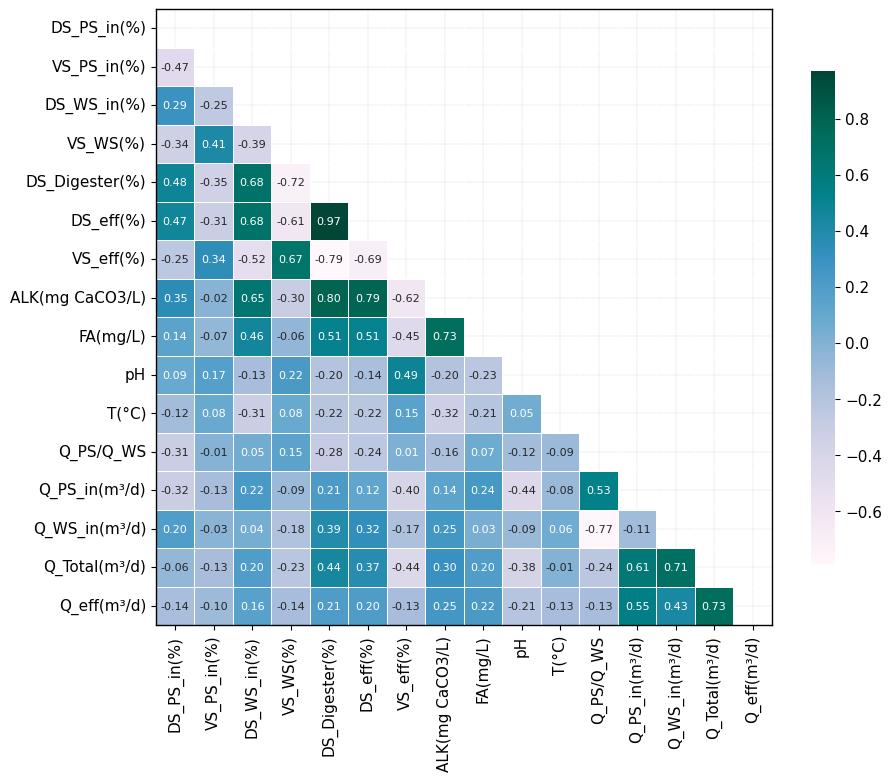

In [8]:
# Define colormaps for the correlation heatmaps:
# 'pearson_cmap' uses the PuBuGn colormap, which transitions from light blue to dark green,
# providing a visually appealing representation of Pearson correlation coefficients.
# 'spearman_cmap' uses the PRGn colormap, which transitions from purple to green,
# suitable for highlighting Spearman correlation coefficients, especially for non-linear relationships.
pearson_cmap = plt.cm.PuBuGn

# Create and save Pearson correlation heatmap
fig1, ax1 = plt.subplots(figsize=(10, 8))  # Create a figure and Axes for Pearson
plot_corr_heatmap(df_for_modeling, ax=ax1, method='pearson', cmap=pearson_cmap,
                  triangular=True, handle_missing='zeros', use_title=False)
plt.savefig('pearson_correlation_heatmap.png')  # Save Pearson heatmap
# plt.close(fig1)  # Close the figure

Heatmaps saved as 'pearson_correlation_heatmap.png' and 'spearman_correlation_heatmap.png'.


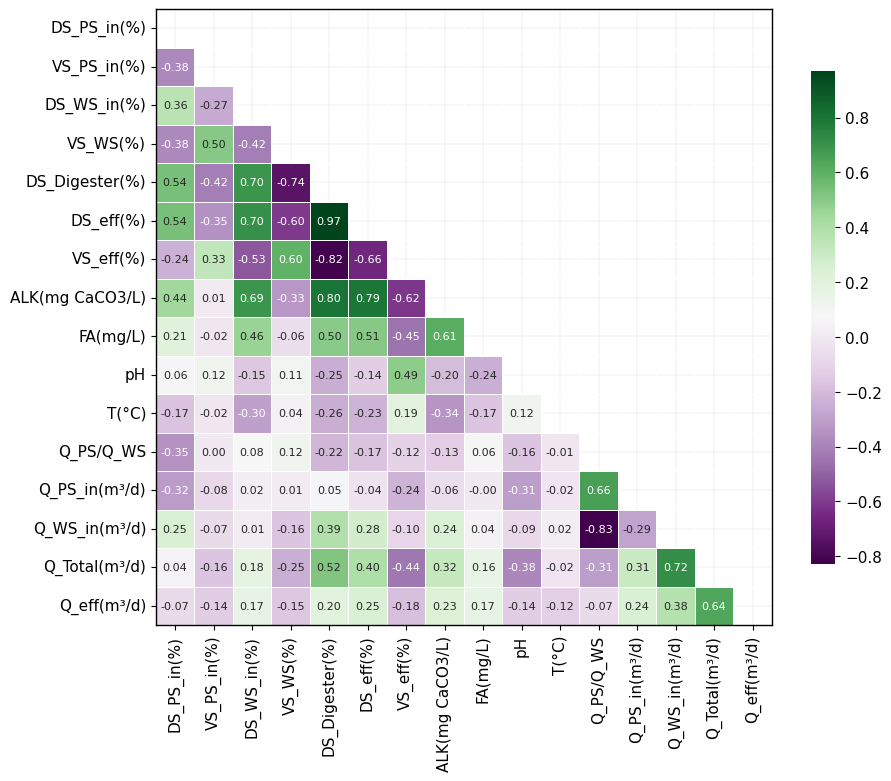

In [9]:
# Create and save Spearman correlation heatmap
spearman_cmap = plt.cm.PRGn
fig2, ax2 = plt.subplots(figsize=(10, 8))  # Create a figure and Axes for Spearman
plot_corr_heatmap(df_for_modeling, ax=ax2, method='spearman', cmap=spearman_cmap,
                  triangular=True, handle_missing='zeros', use_title=False)
plt.savefig('spearman_correlation_heatmap.png')  # Save Spearman heatmap
# plt.close(fig2)  # Close the figure

# Perform garbage collection
gc.collect()
print("Heatmaps saved as 'pearson_correlation_heatmap.png' and 'spearman_correlation_heatmap.png'.")

# Modeling with all features

In [10]:
# Fine-tune the LightGBM model using the best hyperparameters found.
# The following dictionary contains the best hyperparameters obtained from tuning.
# Note that LightGBM is non-deterministic; results may vary in future runs
# due to factors such as the system clock affecting the random seed.
# You can rerun the hyperparameter tuning process by uncommenting the line below:
# best_params = tune_hyperparameters(X_train, y_train)

# or intead use the following set of hyperparameters that are the result of
# (best_params = tune_hyperparameters(X_train, y_train)) for our dataset.
# in case your dataset is differen you should run tune_hyperparameters function
best_params = {
    'objective': 'regression',
    'metric': 'huber',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'feature_pre_filter': False,
    'lambda_l1': 8.647079267657375e-07,
    'lambda_l2': 0.1371177242735508,
    'num_leaves': 31,
    'feature_fraction': 0.92,
    'bagging_fraction': 0.9493636213857096,
    'bagging_freq': 7,
    'min_child_samples': 20
}



# Print the best hyperparameters
print("Best Hyperparameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

print("#" * 80)
# Initialize and fit the LightGBM model with the best hyperparameters
model_all_features = LGBMRegressor(random_state=SEED, n_jobs=-1, **best_params)
model_all_features.fit(X_train, y_train)

# Evaluate the model on training and testing datasets
model_all_features_results = evaluate_model(X_train, y_train, X_test, y_test, best_params)

# Convert the evaluation to df
model_all_features_results_df = pd.DataFrame.from_dict(
    model_all_features_results,
    orient="index"
)

# Save evaluation results to a CSV file
model_all_features_results_df.T.to_csv("model_all_features_results.csv")

# Print the evaluation results
print("Model Evaluation Results:")
print("=" * 30)  # Separator line

for metric, value in model_all_features_results.items():
    print(f"{metric:<15}: {value:.4f}")  # Format: left-aligned metric name, right-aligned value with 4 decimal places


# Plot permutation importance for the fitted model using the test set
# This function visualizes the importance of each feature in predicting the target variable
# by calculating how much the model's performance decreases when the values of that feature are permuted.
# It is essential to evaluate all features' importance to understand their contributions to the model's predictions,
# which can help in feature selection, model interpretation, and improving model performance.
plot_permutation_importance(
    model=model_all_features,  # The trained model that includes all features
    X=X_test,                 # The test dataset containing features for evaluation
    y=y_test,                 # The true target values for the test dataset
    saving_prefix=f"all_features"  # A prefix for saving the plot, indicating it includes all features
)


Best Hyperparameters:
  objective: regression
  metric: huber
  verbosity: -1
  boosting_type: gbdt
  feature_pre_filter: False
  lambda_l1: 8.647079267657375e-07
  lambda_l2: 0.1371177242735508
  num_leaves: 31
  feature_fraction: 0.92
  bagging_fraction: 0.9493636213857096
  bagging_freq: 7
  min_child_samples: 20
################################################################################
Model Evaluation Results:
Train MAE      : 1032.6676
Train MSE      : 3024063.7468
Train RMSE     : 1738.9835
Train R2       : 0.9739
Test MAE       : 3360.0979
Test MSE       : 23244700.5032
Test RMSE      : 4821.2758
Test R2        : 0.8264
CV Score Mean  : 0.7206


In [11]:
# Constants for plot settings
S = 20  # Marker size for scatter plots
ALPHA = 0.8  # Transparency level for scatter points
FIGSIZE = (3.3 * 1.5, 2.54 * 1.5)  # Figure size for plots

# Extract evaluation metrics from the model results
R2_TRAIN = round(model_all_features_results['Train R2'], 3)  # R² score for training set
R2_TEST = round(model_all_features_results['Test R2'], 3)    # R² score for testing set
TRAIN_MAE = round(model_all_features_results['Train MAE'], 3)  # Mean Absolute Error for training set
TEST_MAE = round(model_all_features_results['Test MAE'], 3)    # Mean Absolute Error for testing set

# Plot Actual vs Predicted for Testing Set
fig, ax = plt.subplots(figsize=FIGSIZE)
model_name = model_all_features.__class__.__name__
PredictionErrorDisplay.from_estimator(
    model_all_features,
    X_test,
    y_test,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": ALPHA,
                    "color": '#EE6677',
                    "label": f"Testing Set - $R^2$: {R2_TEST}",
                    "s": S},
    line_kwargs={"color": "black"},
    ax=ax)

ax.set_ylabel(f"Actual {y.name}")  # Label for actual values
ax.set_xlabel(f"Predicted {y.name}")  # Label for predicted values
ax.legend(loc="upper left")  # Legend position
ax.figure.tight_layout()  # Adjust layout to prevent clipping
plt.savefig("actual_vs_predicted_lgb_test.png")  # Save the plot as PNG
plt.close()  # Close the plot to free memory

# Plot Actual vs Predicted for Training Set
fig, ax = plt.subplots(figsize=FIGSIZE)
PredictionErrorDisplay.from_estimator(
    model_all_features,
    X_train,
    y_train,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": ALPHA,
                    "color": '#66CCEE',
                    "label": f"Training Set - $R^2$: {R2_TRAIN}",
                    "s": S},
    line_kwargs={"color": "black"},
    ax=ax)

ax.set_ylabel(f"Actual {y.name}")  # Label for actual values
ax.set_xlabel(f"Predicted {y.name}")  # Label for predicted values
ax.legend(loc="upper left")  # Legend position
ax.figure.tight_layout()  # Adjust layout to prevent clipping
plt.savefig("actual_vs_predicted_lgb_train.png", bbox_inches="tight")  # Save the plot as PNG
plt.close()  # Close the plot to free memory

# Plot Residuals for Training and Testing Sets
fig, ax = plt.subplots(figsize=FIGSIZE)
PredictionErrorDisplay.from_estimator(
    model_all_features,
    X_train,
    y_train,
    scatter_kwargs={"color": "#66CCEE",
                    "label": f"Training Set - MAE: {TRAIN_MAE}",
                    "alpha": ALPHA,
                    "s": S},
    line_kwargs={"color": "Black"},
    ax=ax)

PredictionErrorDisplay.from_estimator(
    model_all_features,
    X_test,
    y_test,
    scatter_kwargs={"color": "#EE6677",
                    "label": f"Testing Set - MAE: {TEST_MAE}",
                    "alpha": ALPHA,
                    "s": S},
    line_kwargs={"color": "Black"},
    ax=ax)

ax.set_xlabel(f"Predicted {y.name}")  # Label for predicted values
ax.set_ylabel("Residuals (Actual - Predicted)")  # Label for residuals
ax.legend(loc="upper left")  # Legend position
ax.figure.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(f"evaluation_of_{model_name}_residual_plots.png", bbox_inches="tight")  # Save the plot as PNG
plt.close()  # Close the plot to free memory

# Plot Kernel Density Estimate (KDE) of Residuals for Testing Set
residuals_test = y_test - model_all_features.predict(X_test)  # Calculate residuals
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.text(0.55, 0.8,
        f"Mean: {residuals_test.mean().round(1)}\nStd: {round(residuals_test.std(), 1)}",
        transform=ax.transAxes, fontsize=10)  # Display mean and standard deviation of residuals

sns.kdeplot(residuals_test, ax=ax, label=f"{model_name}", color='#228833', linewidth=1)  # KDE plot of residuals

ax.set_xlabel("Residuals")  # Label for residuals axis
ax.set_ylabel("Density")     # Label for density axis
ax.figure.tight_layout()      # Adjust layout to prevent clipping
plt.xticks(rotation=12)      # Rotate x-axis ticks for better readability

plt.savefig(f"Residuals_kde_{model_name}.png")  # Save the KDE plot as PNG
plt.close()   # Close the plot to free memory
gc.collect()   # Perform garbage collection


11636

# Confidence Intervals
    Conformal Prediction Method (Jacknife+)






In [12]:
# According to (%%time) ==> Wall time: 2min 13s
# Initialize the conformal predictor using the jackknife+ method
conformal_predictor = MapieRegressor(
    estimator=LGBMRegressor(random_state=SEED, n_jobs=-1, **best_params),  # Base estimator (LightGBM)
    method='plus',  # Specify jackknife+ method for conformal prediction
    cv=len(X_train),  # Use leave-one-out cross-validation
    random_state=SEED  # Set random seed for reproducibility
)

# Fit the conformal predictor to the training data
conformal_predictor.fit(X_train, y_train)

# Predict on the test set and obtain prediction intervals (PIs)
y_pred, y_pis = conformal_predictor.predict(X_test, alpha=0.15)  # Set significance level (alpha)
y_pred_lower, y_pred_upper = y_pis[:, 0, :].squeeze(), y_pis[:, 1, :].squeeze()  # Extract lower and upper bounds of PIs

# Compute marginal coverage and average width of the prediction intervals
coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)  # Calculate coverage score
width = regression_sharpness(y_pred_lower=y_pred_lower, y_pred_upper=y_pred_upper)  # Calculate average width (sharpness)

# Display the results of coverage and width
print(f"Marginal coverage: {np.round(coverage, 2)}")  # Print rounded marginal coverage
print(f"Average width: {np.round(width, 2)}")  # Print rounded average width

# Store the results in the DataFrame for further analysis or reporting
model_all_features_results_df.loc["jackknife_Alpha15MarginalCoverage"] = coverage  # Save coverage score
model_all_features_results_df.loc["jackknife_Alpha15AverageWidth"] = width  # Save average width


Marginal coverage: 0.86
Average width: 12522.04


In [13]:
# Define the range of alpha values to test
alpha_values = np.arange(0.05, 1.00, 0.05)  # From 0.05 to 0.95 with a step of 0.05

# Initialize a list to store results
results = []

# Loop through each alpha value
for alpha in tqdm(alpha_values):
    # Predict on the test set and obtain prediction intervals (PIs)
    y_pred, y_pis = conformal_predictor.predict(X_test, alpha=alpha)  # Predict with current alpha

    # Extract lower and upper bounds of PIs
    y_pred_lower, y_pred_upper = y_pis[:, 0, :].squeeze(), y_pis[:, 1, :].squeeze()

    # Compute marginal coverage and average width of the prediction intervals
    coverage = regression_mean_coverage(y_test, y_pred_lower, y_pred_upper)  # Calculate coverage score
    width = regression_sharpness(y_pred_lower=y_pred_lower, y_pred_upper=y_pred_upper)  # Calculate average width (sharpness)

    # Append the results for the current alpha to the list
    results.append({'alpha': alpha, 'coverage': coverage, 'width': width})

# Convert the results list into a DataFrame for better visualization and analysis
conformal_results_df = pd.DataFrame(results)

# Save the results DataFrame to a CSV file with a descriptive name
conformal_results_df.to_csv("conformal_prediction_results_alpha_analysis.csv", index=False)
conformal_results_df.round(3).to_csv("conformal_prediction_results_alpha_analysis_rounded_2024-10-18.csv", index=False)

100%|██████████| 2/2 [00:14<00:00,  7.48s/it]


In [14]:
# According to (%%time) ==> Wall time: 4.62 s
# Sort the indices of the true test values in ascending order
sort_by = np.argsort(y_test)

# Sort true values and predictions based on the sorted indices
y_test_sorted = y_test.to_numpy()[sort_by]  # True values sorted
y_pred_sorted = y_pred[sort_by]  # Predictions sorted
y_pred_lower_sorted = y_pred_lower[sort_by]  # Lower bounds of prediction intervals sorted
y_pred_upper_sorted = y_pred_upper[sort_by]  # Upper bounds of prediction intervals sorted

# Determine points outside the prediction interval
outside_interval = (y_test_sorted < y_pred_lower_sorted) | (y_test_sorted > y_pred_upper_sorted)

# Create a title for the plot that includes coverage and width scores
title = (
    f"Jackknife+ Coverage Score: "
    f"{np.round(coverage, 3)} "
    f"with Mean Width Score of "
    f"{np.round(width, 3)} "
    f"(alpha = 0.15)"
)

# Plotting setup
plt.figure(figsize=(3.3 * 2, 2.5 * 1.25))  # Set figure size

# Plot true values with specific styling
plt.plot(y_test_sorted, label='True Values', color='#CCBB44', zorder=0.5, markersize=2)
# Plot predicted values with specific styling
plt.plot(y_pred_sorted, label='Predictions', color='#228833', zorder=1, markersize=2)

# Fill the area between lower and upper prediction intervals to visualize uncertainty
plt.fill_between(range(len(y_test_sorted)), y_pred_lower_sorted, y_pred_upper_sorted,
                 alpha=0.5, label='Prediction Interval', zorder=0, color='#66CCEE')

# Highlight points that fall outside the prediction interval for better visibility
plt.scatter(np.where(outside_interval)[0], y_test_sorted[outside_interval],
            marker='.', color='#EE3377', s=30, zorder=2,
            label='Outside Prediction Interval')

# Set axis labels and title for clarity in the plot
plt.xlabel(f'Sorted Sample Index Based on {y_train.name} Value')  # X-axis label
plt.ylabel(f'{y_train.name}')  # Y-axis label
# plt.title(title)  # Set the plot title
plt.legend(loc="upper left")  # Position the legend in the upper left corner

# Save the plot as a PNG file for later analysis or reporting
plt.savefig(f"jacknife.png")
plt.close()  # Close the plot to free up memory resources
gc.collect()  # Perform garbage collection to clean up unused memory


9862

# Interpret with feature selection method


In [37]:
# According to (%%time) ==> 1h 3min 4s if you run main_evaluation_loop function
# and not upload the file
# Compute the distance matrix using Spearman correlation
# Fill NaN values with 0 and calculate the absolute Spearman correlation matrix
# The distance matrix is then computed as 1 - abs(correlation)
distance_matrix = 1 - np.abs(X.fillna(0).corr(method="spearman"))

# Perform hierarchical clustering using Ward's method on the distance matrix
dist_linkage = hierarchy.ward(squareform(distance_matrix))

# Create a figure for the dendrogram plot
fig, ax = plt.subplots(figsize=(3.3 * 1.5, 2.5 * 1.5))  # Set figure size

# Generate and plot the dendrogram based on the hierarchical clustering results
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax, leaf_rotation=90  # Rotate leaf labels for better readability
)

# Save the dendrogram plot as a PNG file for further analysis or reporting
plt.savefig("Feature Clustering.png")
plt.close()  # Close the plot to free up memory resources
gc.collect()  # Perform garbage collection to clean up unused memory

# Extract cluster IDs based on the hierarchical clustering results
# Here, we use a distance threshold of 1 to form flat clusters
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")

# Create a mapping from cluster IDs to feature indices
cluster_id_to_feature_ids = defaultdict(list)  # Default dictionary to hold lists of feature indices for each cluster
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)  # Append feature index to corresponding cluster ID


# Check if the feature_combination_analysis.csv file exists in the current directory
if not os.path.exists("feature_combination_analysis.csv"):
    print("The file 'feature_combination_analysis.csv' does not exist.")
    print("Please upload the file if you have it.")

    # Prompt user to upload a file
    uploaded = files.upload()  # This will allow users to upload files

    # Check if the uploaded file matches our expected filename
    if "feature_combination_analysis.csv" in uploaded:
        print("File uploaded successfully.")

    else:
        # If the file exists, proceed to run the main evaluation loop
        feature_combination_analysis = main_evaluation_loop(X_train,
                                                            y_train,
                                                            X_test,
                                                            y_test,
                                                            cluster_id_to_feature_ids,
                                                            max_runs=2)  # Pass clustered features to the evaluation function

        # Save the feature combination analysis results to a CSV file for further review and analysis
        feature_combination_analysis.to_csv("feature_combination_analysis.csv")

else:
    print("The file 'feature_combination_analysis.csv' does exist.")
    feature_combination_analysis = pd.read_csv("feature_combination_analysis.csv",
                                               index_col=0)
    feature_combination_analysis = feature_combination_analysis.reset_index(drop=True)

The file 'feature_combination_analysis.csv' does exist.


In [38]:
# Sort the DataFrame by "Test R2" in descending order
feature_combination_analysis_sorted = (
    feature_combination_analysis.sort_values(by=["Test R2"], ascending=False)
)

# Iterate through the top three rows of the sorted feature combination analysis DataFrame
for idx in tqdm(range(3)):
    # Select features corresponding to the current model from the sorted DataFrame
    # The 'Features' column is expected to be a string representation of a list
    # when we upload the file, so we use eval() to convert it to an actual list
    if type(feature_combination_analysis_sorted.iloc[idx]["Features"]) == list:
        selected_features = feature_combination_analysis_sorted.iloc[idx]["Features"]
    else:

        selected_features = eval(feature_combination_analysis_sorted.iloc[idx]["Features"])

    # Create training and testing sets using the selected features
    X_train_selected = X_train[selected_features]  # Training set with selected features
    X_test_selected = X_test[selected_features]    # Testing set with selected features

    # Retrieve the best parameters for the current model from the sorted DataFrame
    # The 'Best Params' column is also expected to be a string representation
    # of a dictionary, so we use eval() for conversion
    if type(feature_combination_analysis_sorted.iloc[idx]["Best Params"]) == dict:
        params = feature_combination_analysis_sorted.iloc[idx]["Best Params"]
    else:
        params = eval(feature_combination_analysis_sorted.iloc[idx]["Best Params"])

    # Initialize the LightGBM regressor with specified parameters and a random seed for reproducibility
    m = LGBMRegressor(random_state=SEED, n_jobs=-1, **params)

    # Fit the model on the selected training data
    m.fit(X_train_selected, y_train)

    # Retrieve the "Test R2" score for the current model and round it to 3 decimal points for better readability in filenames
    prefix_for_saving_model = round(feature_combination_analysis_sorted.iloc[idx]["Test R2"], 5)

    # Plot permutation importance for the fitted model using the test set
    plot_permutation_importance(
        model=m,
        X=X_test_selected,
        y=y_test,
        saving_prefix=f"model_score_{prefix_for_saving_model,}", # Use rounded "Test R2" to create a unique saving prefix for each model
        figsize=(5.51181, 7.48031 * 0.5)
    )


100%|██████████| 3/3 [00:18<00:00,  6.24s/it]


In [39]:
# Sort the DataFrame by "Test R2" in ascending order
feature_combination_analysis_inverse_sorted = (
    feature_combination_analysis.sort_values(by=["Test R2"], ascending=True)
)

# Iterate through the last three rows of the sorted feature combination analysis DataFrame
for idx in tqdm(range(3)):
    # Select features corresponding to the current model from the sorted DataFrame
    # The 'Features' column is expected to be a string representation of a list, so we use eval() to convert it to an actual list
    if type(feature_combination_analysis_sorted.iloc[idx]["Features"]) == list:
        selected_features = feature_combination_analysis_sorted.iloc[idx]["Features"]
    else:
        selected_features = eval(feature_combination_analysis_sorted.iloc[idx]["Features"])

    # Create training and testing sets using the selected features
    X_train_selected = X_train[selected_features]  # Training set with selected features
    X_test_selected = X_test[selected_features]    # Testing set with selected features

    # Retrieve the best parameters for the current model from the sorted DataFrame
    # The 'Best Params' column is also expected to be a string representation of a dictionary, so we use eval() for conversion
    if type(feature_combination_analysis_sorted.iloc[idx]["Best Params"]) == dict:
        params = feature_combination_analysis_sorted.iloc[idx]["Best Params"]
    else:
        params = eval(feature_combination_analysis_sorted.iloc[idx]["Best Params"])

    # Initialize the LightGBM regressor with specified parameters and a random seed for reproducibility
    m = LGBMRegressor(random_state=SEED, n_jobs=-1, **params)

    # Fit the model on the selected training data
    m.fit(X_train_selected, y_train)

    # # Retrieve the "Test R2" score for the current model and round it to 3 decimal points for better readability in filenames
    prefix_for_saving_model = round(feature_combination_analysis_sorted.iloc[idx]["Test R2"], 5)

    # Plot permutation importance for the fitted model using the test set
    plot_permutation_importance(
        model=m,
        X=X_test_selected,
        y=y_test,
        saving_prefix=f"model_score_{prefix_for_saving_model,}", # Use rounded "Test R2" to create a unique saving prefix for each model
        figsize=(5.51181, 7.48031 * 0.5)
    )


100%|██████████| 3/3 [00:15<00:00,  5.02s/it]


In [42]:
# Get the current date
current_date = datetime.now()

# Create a string representing the current date in the desired format
date_of_coding = current_date.strftime("%Y-%m-%d")  # Format: YYYY-MM-DD

# Print the resulting string with a custom message
print(f"{date_of_coding} BiogasAnalysis")  # Output the date and project name

# Create a ZIP file named with the current date and project name
with ZipFile(f"BiogasAnalysis_{date_of_coding}.zip", "w") as z:  # Note: Added .zip extension for clarity
    # Iterate over files in the current directory
    for file in os.listdir():
        # Check if the file ends with .svg or .csv extensions
        if file.endswith((".png", ".csv")):
            z.write(file)  # Add the file to the ZIP archive

# Download the created ZIP file to the local system (specific to Google Colab)
files.download(f"BiogasAnalysis_{date_of_coding}.zip")  # Initiate download of the ZIP file


2025-02-01 BiogasAnalysis


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>